In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
pre_data = pd.read_csv("arquivos/oasis_cross-sectional.csv")

In [15]:
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


In [3]:
pre_data.isna().sum()

ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64

<Axes: >

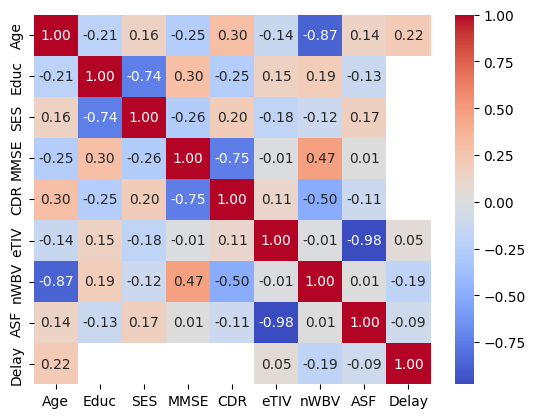

In [7]:
correlation_matrix = pre_data.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

queremos prencher os valores de MMSE

Temos inicialmente duas opções:

- MMSE ~ mean(MMSE)
- MMSE ~ Educ + nWBV

In [44]:
calculos_MMSE = pre_data[["Educ","nWBV" ,'MMSE']].copy()
calculos_MMSE.dropna(inplace=True)
calculos_MMSE.reset_index(drop=True, inplace=True)

calculos_MMSE['media'] = calculos_MMSE.MMSE.mean()

In [45]:
calculos_MMSE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Educ    235 non-null    float64
 1   nWBV    235 non-null    float64
 2   MMSE    235 non-null    float64
 3   media   235 non-null    float64
dtypes: float64(4)
memory usage: 7.5 KB


In [50]:
mse = mean_squared_error(calculos_MMSE['MMSE'], calculos_MMSE['media'])
mae = mean_absolute_error(calculos_MMSE['MMSE'], calculos_MMSE['media'])

rmse = np.sqrt(mse)

print(f"Raiz Quadrada do Erro Quadrático Médio (RMSE): {rmse}")
print(f"Erro Absoluto Médio (MAE): {mae}")

Raiz Quadrada do Erro Quadrático Médio (RMSE): 3.688996030861034
Erro Absoluto Médio (MAE): 2.8121321865097335


<Axes: xlabel='MMSE', ylabel='media'>

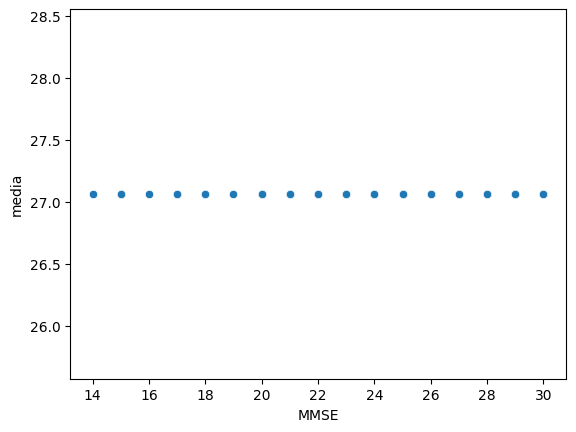

In [61]:
sns.scatterplot(x = calculos_MMSE['MMSE'],y = calculos_MMSE['media'])

LinearRegression(fit_intercept=False)

In [59]:
# Definir as variáveis independentes e dependente
X = calculos_MMSE[['Educ', 'nWBV']]
y = calculos_MMSE['MMSE']

# Ajustar o modelo de regressão linear
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

predictions = model.predict(X)

# Calcular o R²
r2 = r2_score(y, predictions)

# Calcular o Erro Médio Absoluto (MAE)
mae = mean_absolute_error(y, predictions)

mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)

print(f"R²: {r2}")
print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Raiz Quadrada do Erro Quadrático Médio (RMSE): {rmse}")


R²: 0.26454517542045586
Erro Médio Absoluto (MAE): 2.3365938113325653
Raiz Quadrada do Erro Quadrático Médio (RMSE): 3.16363366693008


<Axes: xlabel='MMSE'>

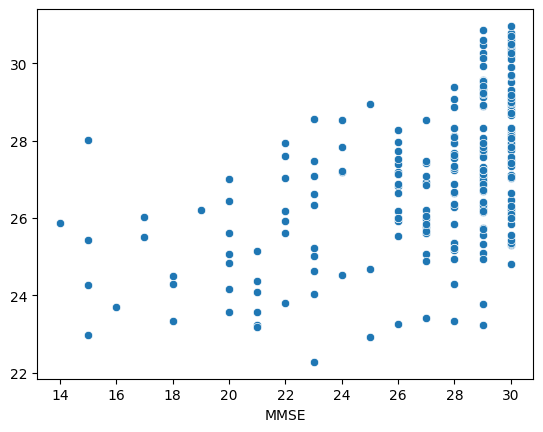

In [62]:
sns.scatterplot(x = y, y = predictions)

In [63]:
def load_data():
    data = pd.read_csv('arquivos/oasis_cross-sectional.csv')
    # Filtrar os dados onde MMSE e CDR não são nulos
    data = data.dropna(subset=['MMSE', 'CDR'])
    return data

data = load_data()

In [64]:
data.drop('Delay', axis=1, inplace=True)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 0 to 415
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      235 non-null    object 
 1   M/F     235 non-null    object 
 2   Hand    235 non-null    object 
 3   Age     235 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    235 non-null    int64  
 9   nWBV    235 non-null    float64
 10  ASF     235 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 22.0+ KB


In [66]:
data.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
count,235.000000,235.000000,216.000000,235.00000,235.000000,235.000000,235.000000,235.000000
mean,72.344681,3.178723,2.490741,27.06383,0.285106,1459.497872,0.749132,1.216511
std,12.091369,1.311510,1.120593,3.69687,0.383405,160.368070,0.047906,0.129427
min,33.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000
25%,66.000000,2.000000,2.000000,26.00000,0.000000,1348.000000,0.713500,1.133500
50%,73.000000,3.000000,2.000000,29.00000,0.000000,1447.000000,0.747000,1.213000
75%,81.000000,4.000000,3.000000,30.00000,0.500000,1548.000000,0.784000,1.302000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.847000,1.563000


In [13]:
data.to_csv("dados.csv", index=False)

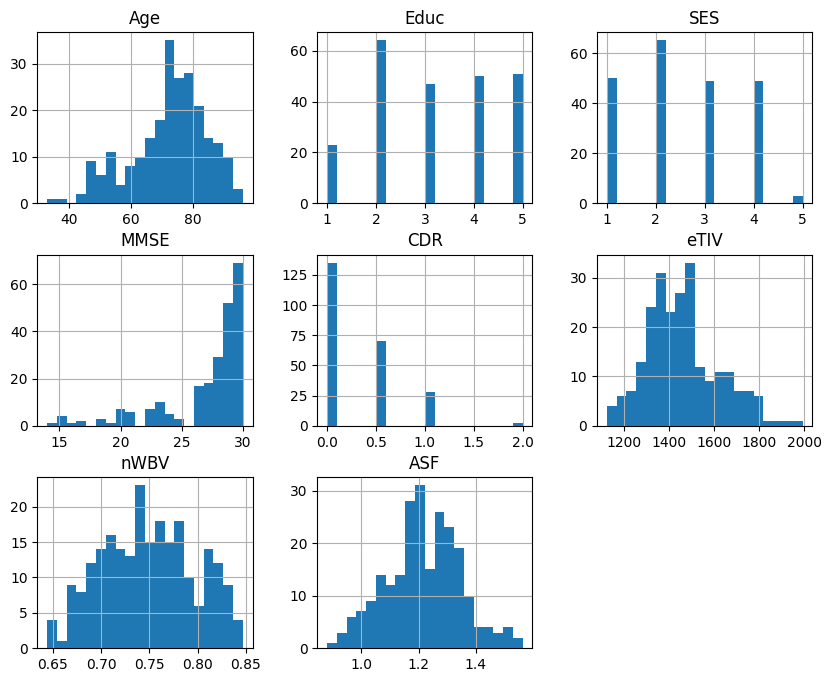

In [70]:
data.hist(figsize=(10, 8), bins=20)
plt.show()